<a href="https://colab.research.google.com/github/ahmed-hassan1997/Data-Analysis-Visualization/blob/master/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## use dataset for loan

link dataset: https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv

In [2]:
url = "https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv"
df = pd.read_csv(url)
df.head(2)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,...,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,...,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.0,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,0.0796,0.0249,0.0547,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,...,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


## data pipline 

* data exploration
* data cleaning
* data visualization 
###### uinvariate
###### bivariate
###### multivariate

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

Text(0.5, 1.0, ' number of null value in column')

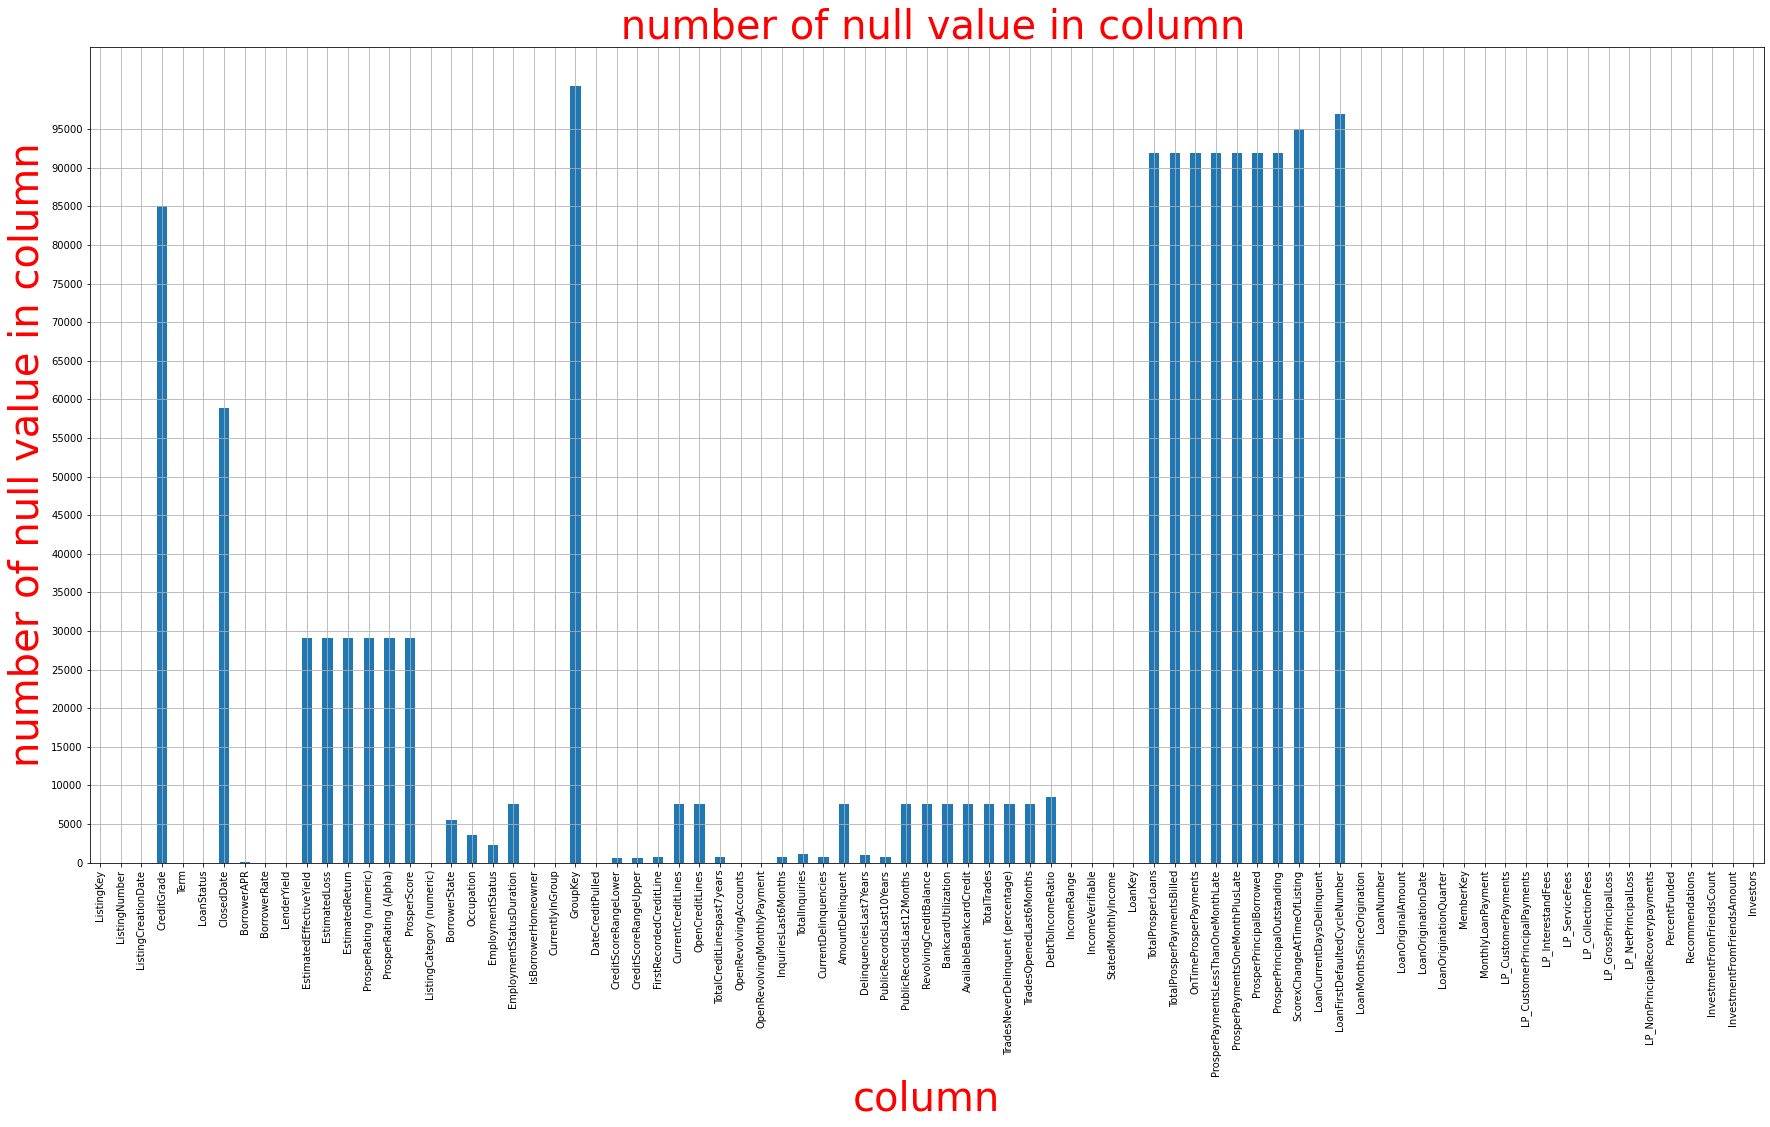

In [5]:
plt.figure(figsize = (30,15))
null_val = df.isnull().sum()
null_val.plot(kind='bar')
plt.yticks([i for i in np.arange(0,100000,5000)])
plt.grid()
plt.xlabel('column' , color ='red', fontsize=40)
plt.ylabel('number of null value in column', color ='red', fontsize=40)
plt.title(" number of null value in column", color ='red', fontsize=40)

## columns which have null

In [6]:
df.isnull().sum().sort_values(ascending =False)[:10]


GroupKey                               100596
LoanFirstDefaultedCycleNumber           96985
ScorexChangeAtTimeOfListing             95009
ProsperPaymentsLessThanOneMonthLate     91852
ProsperPaymentsOneMonthPlusLate         91852
OnTimeProsperPayments                   91852
TotalProsperPaymentsBilled              91852
TotalProsperLoans                       91852
ProsperPrincipalBorrowed                91852
ProsperPrincipalOutstanding             91852
dtype: int64

## summary 

there are alot of null value which we will solved it 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

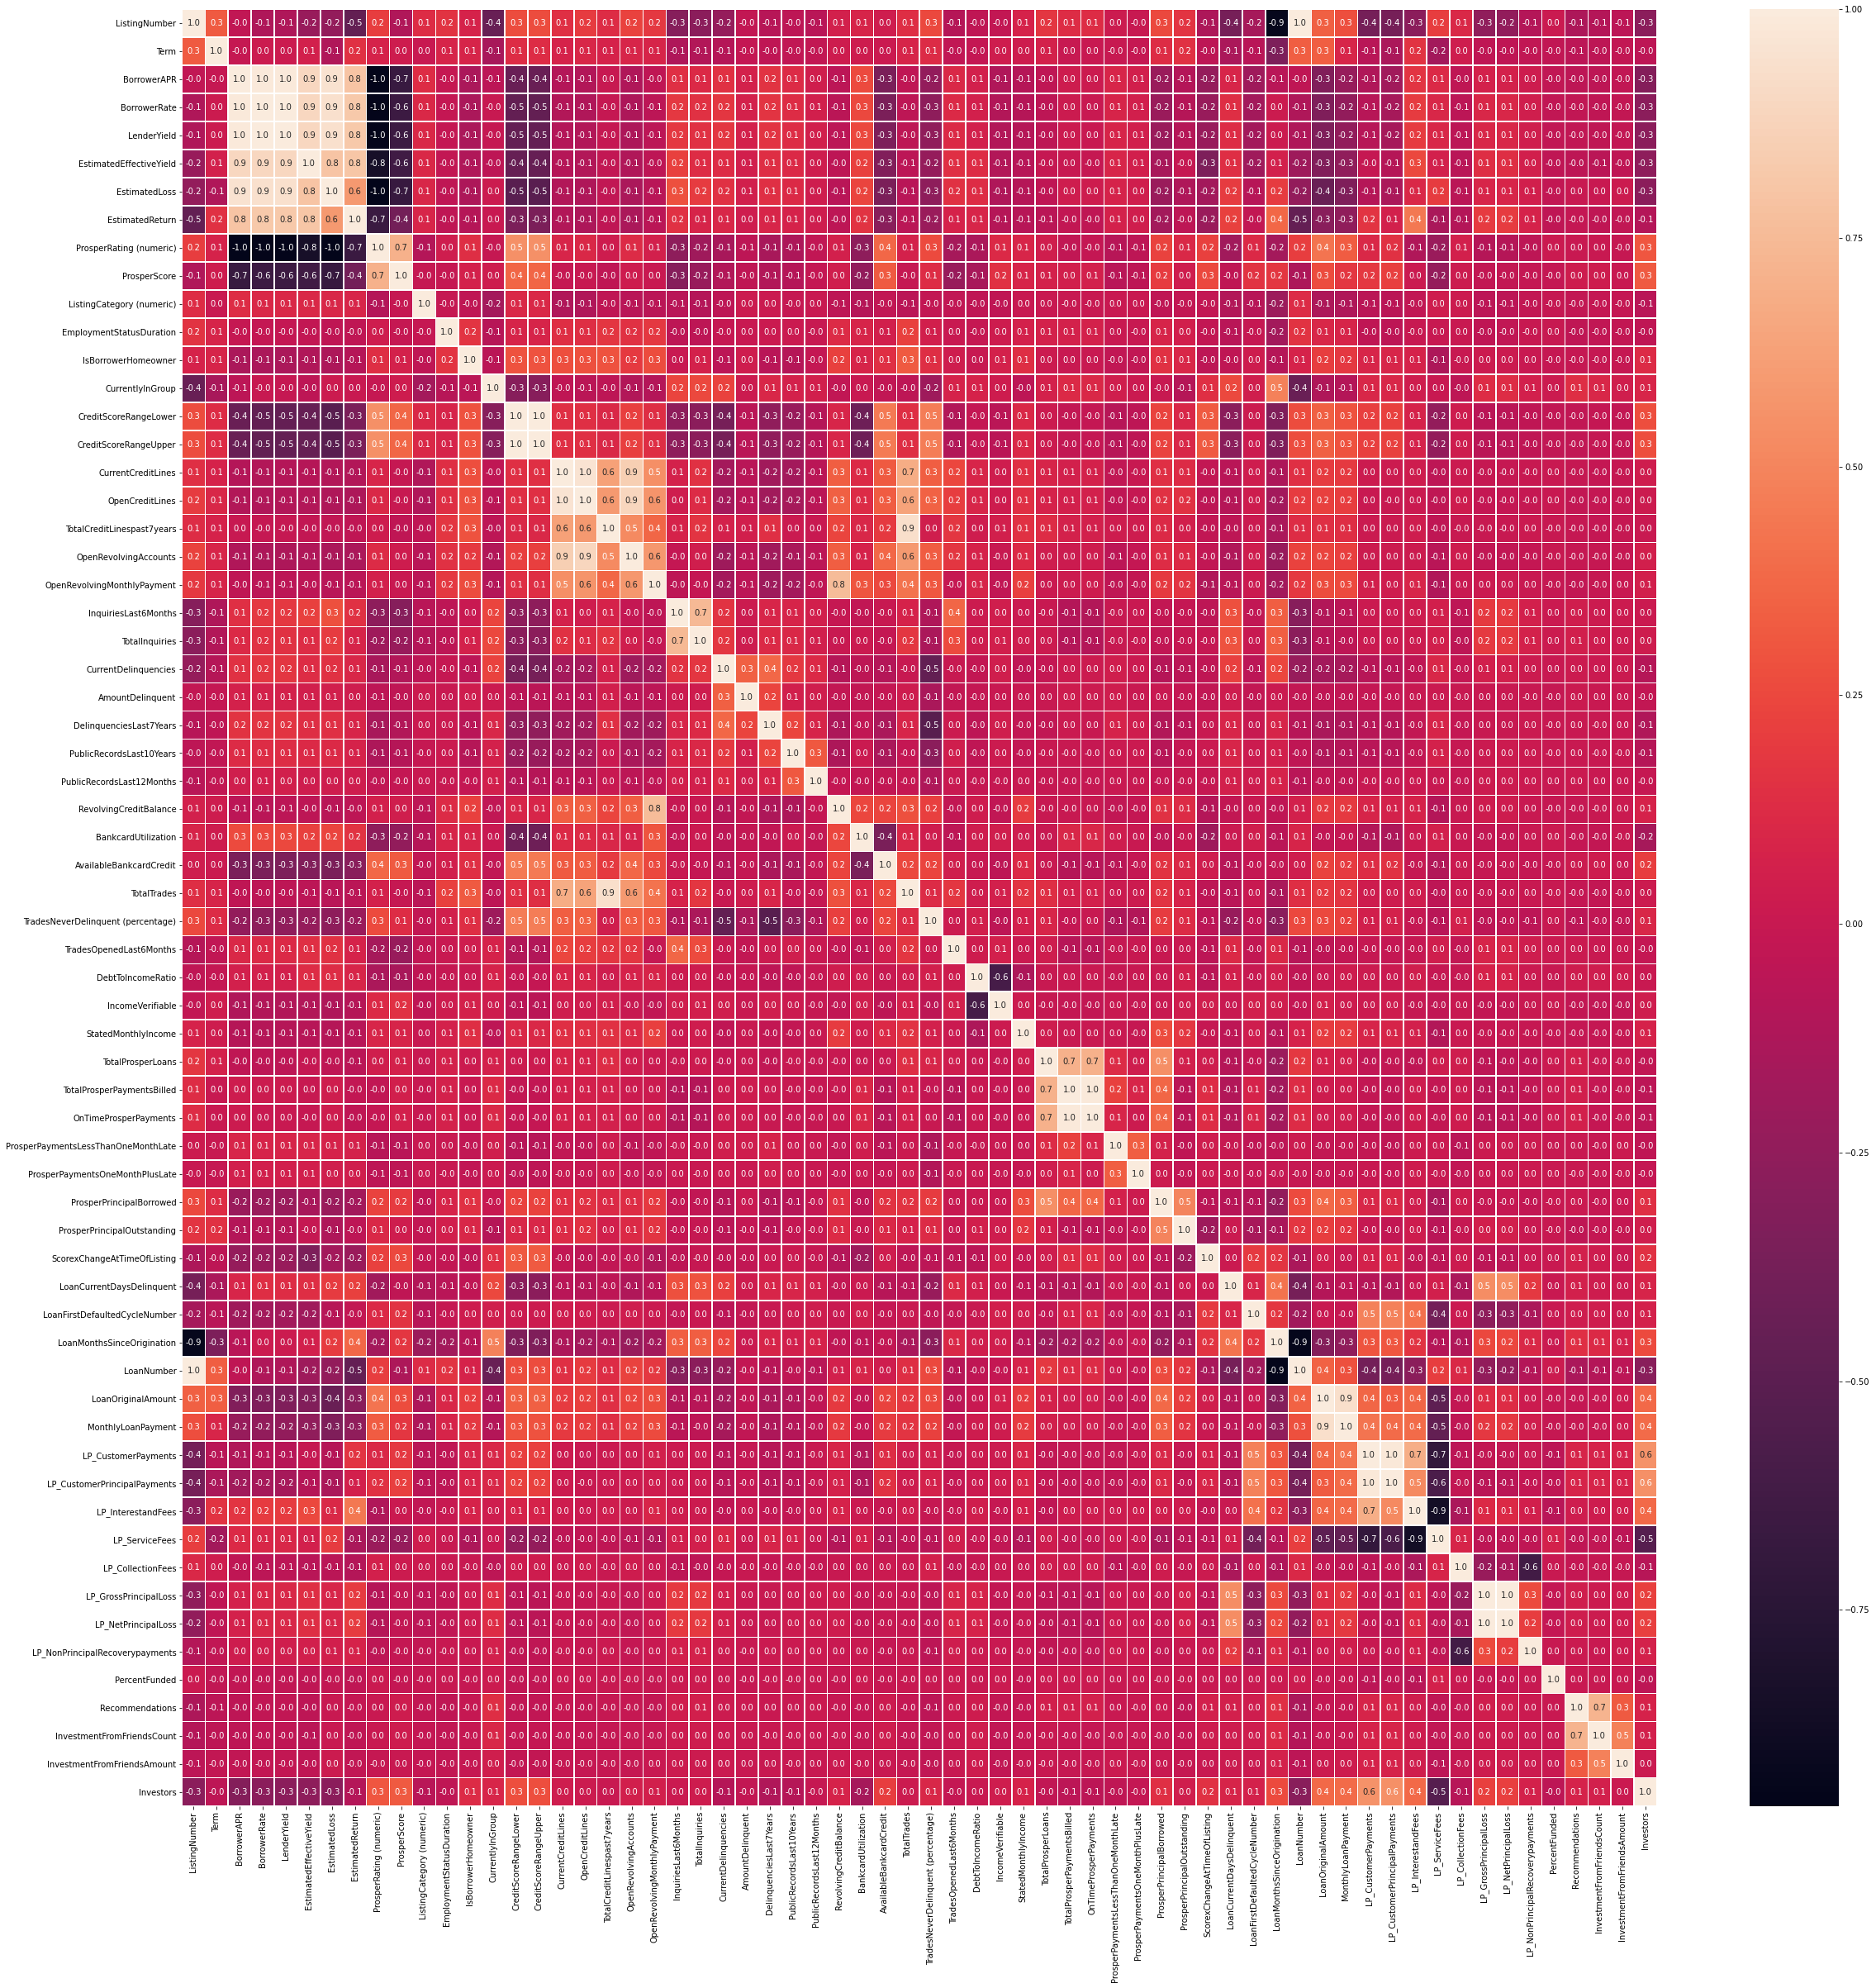

In [8]:
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(), annot=True , linewidths=0.60 , fmt='0.1f')

## drop some unimportant column from data

In [9]:
column = ['ListingKey','LoanKey','MemberKey','GroupKey']
df.drop(column , axis =1 , inplace=True)
df.shape

(113937, 77)

## function to fill null value


In [10]:
## fill nan value with mean
def fill_nan_mean(d):
  d.fillna(d.mean() , inplace =True)

## fill nan value with mode
def fill_nan_mode(d):
  d.fillna(d.mode()[0] , inplace = True)



## list column which have float number

In [11]:
## list column which have float number
for col in df.select_dtypes(include=['float64']).columns:
  fill_nan_mean(df[col])
    

In [12]:
## list column which have int number
for col in df.select_dtypes(include = ['int64']).columns:
  fill_nan_mean(df[col])

In [13]:
## fill nan value in date with 0
df['ClosedDate'].replace(np.nan , 0 , inplace =True)

In [14]:
## fill categorical variable with mode
columns = ['CreditGrade','ProsperRating (Alpha)','BorrowerState']

for col in columns:
  fill_nan_mode(df[col])


## drop rest of nan value 

In [15]:
df.dropna(axis = 0 , inplace =True)

In [16]:
df.isnull().sum().sort_values(ascending = False)[:10]


Investors                     0
OpenCreditLines               0
IsBorrowerHomeowner           0
CurrentlyInGroup              0
DateCreditPulled              0
CreditScoreRangeLower         0
CreditScoreRangeUpper         0
FirstRecordedCreditLine       0
CurrentCreditLines            0
TotalCreditLinespast7years    0
dtype: int64

In [17]:
df.head()

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,0.168661,0.080306,0.096068,4.072243,C,5.950067,0,CO,Other,Self-employed,2.000000,True,True,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.000000,4.000000,12.0,1,24.0,3.0,3.0,2.0,472.000000,4.0,0.0,0.000000,0.000000,0.000000,1500.000000,11.000000,0.810000,0.000000,0.17,"$25,000-49,999",True,3083.333333,1.4211,22.934345,22.271949,0.613629,0.04854,8472.311961,2930.313906,-3.223214,0,16.268464,78,19141,9425,2007-09-12 00:00:00,Q3 2007,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,1209647,2014-02-27 08:28:07.900000000,C,36,Current,0,0.12016,0.0920,0.0820,0.079600,0.024900,0.054700,6.000000,A,7.000000,2,CO,Professional,Employed,44.000000,False,False,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.000000,14.000000,29.0,13,389.0,3.0,5.0,0.0,0.000000,0.0,1.0,0.000000,3989.000000,0.210000,10266.000000,29.000000,1.000000,2.000000,0.18,"$50,000-74,999",True,6125.000000,1.4211,22.934345,22.271949,0.613629,0.04854,8472.311961,2930.313906,-3.223214,0,16.268464,0,134815,10000,2014-03-03 00:00:00,Q1 2014,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,0.168661,0.080306,0.096068,4.072243,C,5.950067,0,GA,Other,Not available,96.071582,False,True,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,10.317192,9.260164,3.0,0,0.0,0.0,1.0,1.0,984.507059,0.0,0.0,0.015094,17598.706751,0.561309,11210.225447,23.230034,0.885897,0.802327,0.06,Not displayed,True,2083.333333,1.4211,22.934345,22.271949,0.613629,0.04854,8472.311961,2930.313906,-3.223214,0,16.268464,86,6466,3001,2007-01-17 00:00:00,Q1 2007,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,658116,2012-10-22 11:02:35.010000000,C,36,Current,0,0.12528,0.0974,0.0874,0.084900,0.024900,0.060000,6.000000,A,9.000000,16,GA,Skilled Labor,Employed,113.000000,True,False,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.000000,5.000000,29.0,7,115.0,0.0,1.0,4.0,10056.000000,14.0,0.0,0.000000,1444.000000,0.040000,30754.000000,26.000000,0.760000,0.000000,0.15,"$25,000-49,999",True,2875.000000,1.4211,22.934345,22.271949,0.613629,0.04854,8472.311961,2930.313906,-3.223214,0,16.268464,16,77296,10000,2012-11-01 00:00:00,Q4 2012,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,

## summary after clean data 

1- after exploration data i found that alot of nan value in row  then i solved this problem using alot of statistics mode 

* fill nan value with numeric data using mean 
* fill nan value with categorical data using mode
* fill nan value in columns date with 0
* then drop the rest of the nan value in row

## visualize data 

* univariate 
* bivariate
* multivariate

## drow bar for CreditGrade column

Text(0.5, 1.0, 'frequencies in each categories')

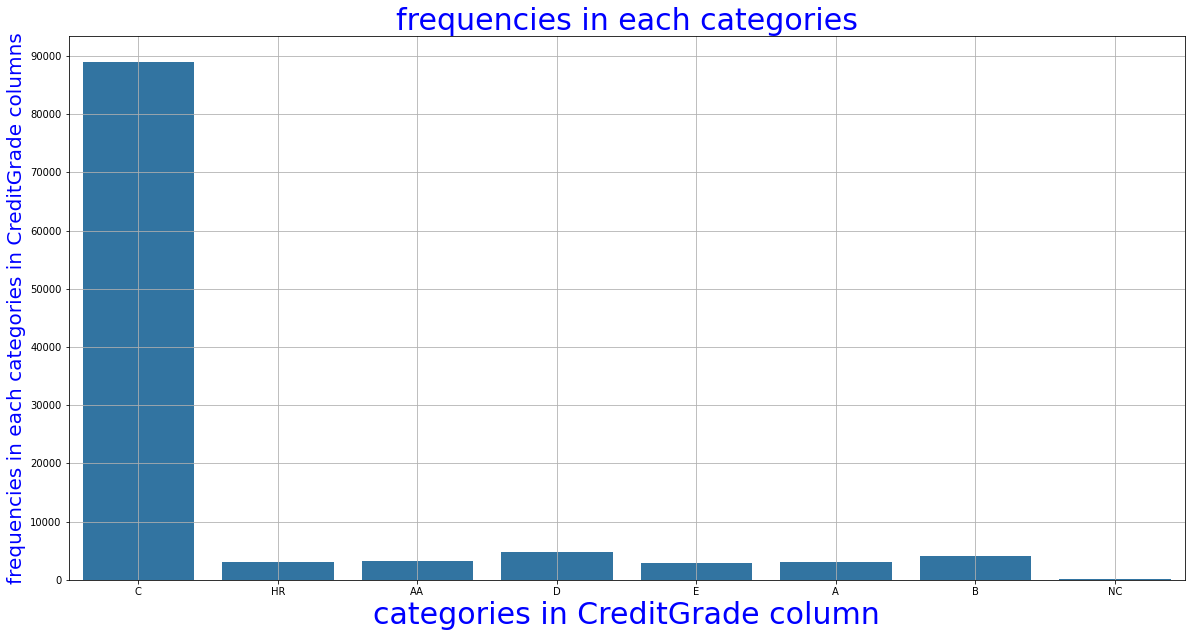

In [18]:
plt.figure(figsize = (20,10))
base_color = sns.color_palette()[0]
sns.countplot(data = df , x = 'CreditGrade' , color = base_color)
plt.yticks([i for i in np.arange(0,100000, 10000)])
plt.grid()
plt.xlabel('categories in CreditGrade column' , fontsize = 30, color ='blue')
plt.ylabel('frequencies in each categories in CreditGrade columns' , fontsize = 20 , color = 'blue')
plt.title('frequencies in each categories', fontsize = 30 ,color = 'blue')

## this plot above give me insigt :

* high frequencies in categories is c 
* the highest categories i used it to fill nan value with this mode 

Text(0.5, 1.0, 'frequencies in each categories')

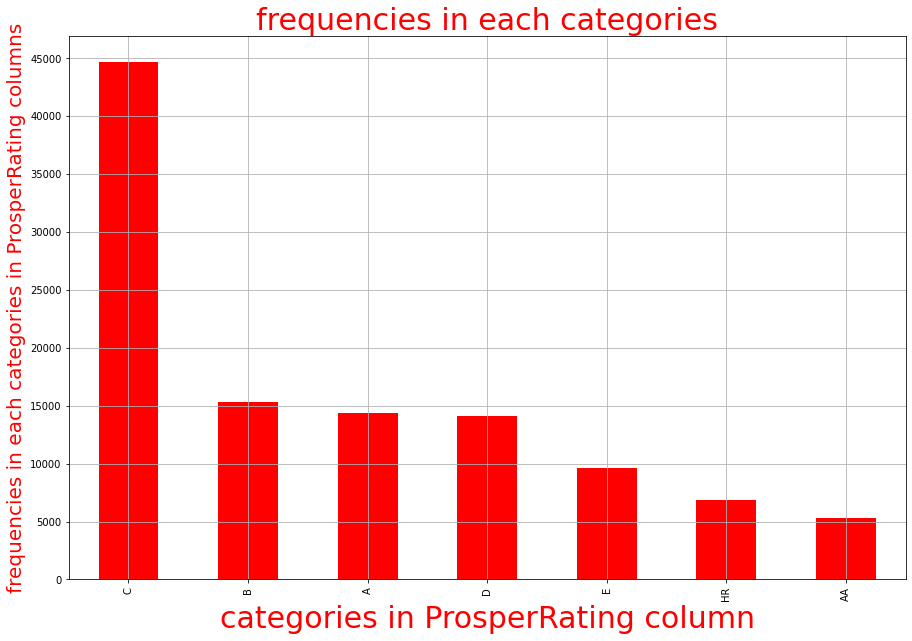

In [19]:
plt.figure(figsize = (15,10))
plt.yticks([i for i in np.arange(0,50000, 5000)])
df['ProsperRating (Alpha)'].value_counts().plot(kind = 'bar' , color = 'red')
plt.grid()

plt.xlabel('categories in ProsperRating column' , fontsize = 30, color ='red')
plt.ylabel('frequencies in each categories in ProsperRating columns' , fontsize = 20 , color = 'red')
plt.title('frequencies in each categories', fontsize = 30 ,color = 'red')

## summary in above plot 

###### what is the higest categories in ProsperRating column ??

* c is the higest 

(-1.100166979465697, 1.100965035280418, -1.1010805595262319, 1.100051455219883)

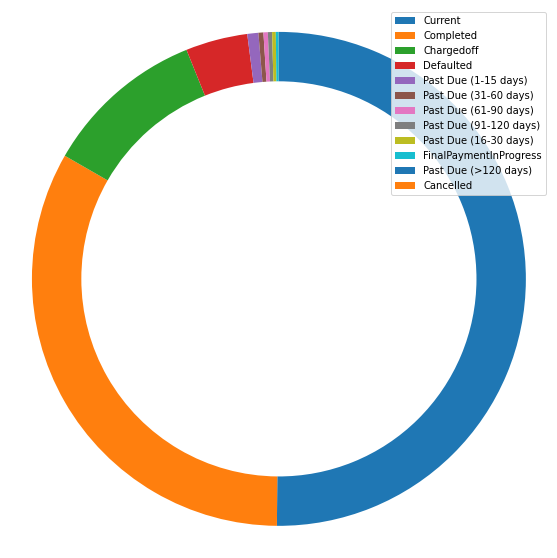

In [20]:
plt.figure(figsize = (15,10))

sort_counts = df['LoanStatus'].value_counts()
plt.pie(sort_counts   , startangle = 90 ,counterclock = False, rotatelabels=True , wedgeprops = {'width' : 0.2}  )
plt.legend( labels =sort_counts.index , loc="best")
plt.axis('square')



## from above figure i notice that 
* 50% from human is  ->>>>>>>>>>>>>>>>> current to loan money
* 33% complete process is finished and take money 


##hint: 
i can't appear percentage of process because alot of categories in small area and i can't appear percentage 

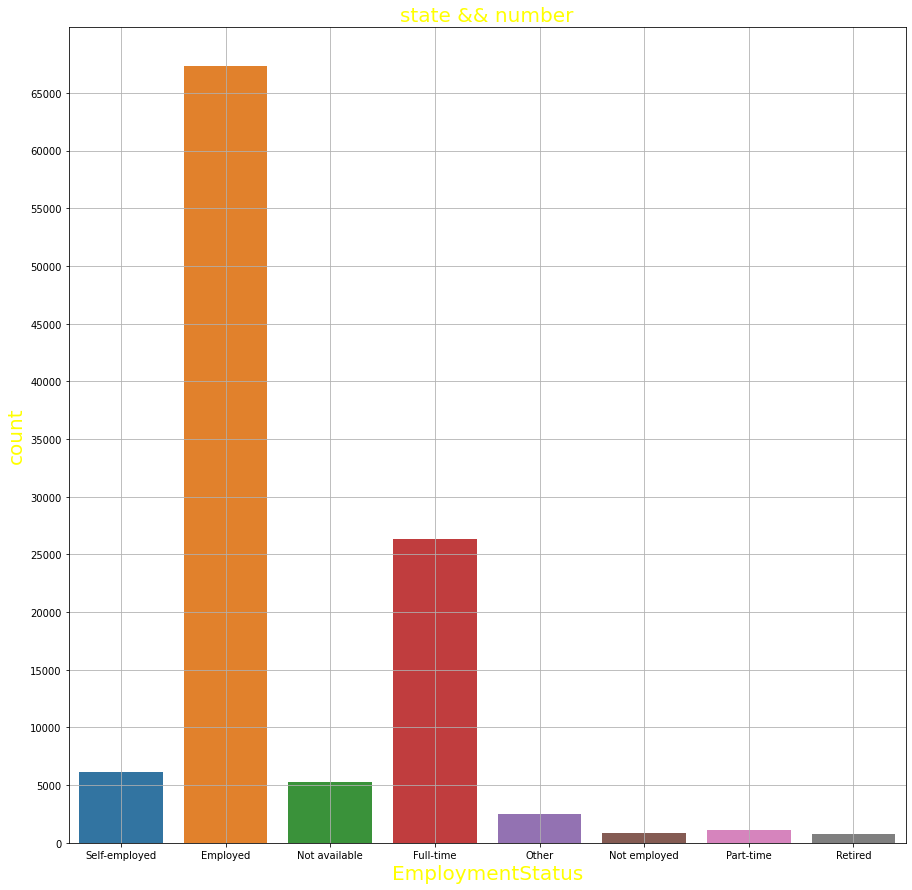

In [21]:
base_color = sns.color_palette()[4]
plt.figure(figsize=(15,15))
plt.xlabel('state of people which take loan ' , color = 'yellow' , fontsize = 20)
plt.ylabel(" numner of people" , color = 'yellow' , fontsize = 20)
plt.title("state && number" , color = 'yellow' , fontsize =20)
plt.yticks([i for i in np.arange(0,70000 , 5000)])
sns.countplot(data = df , x = 'EmploymentStatus')
plt.grid()

## summary for above figure

* employed have the highest number which taken loan

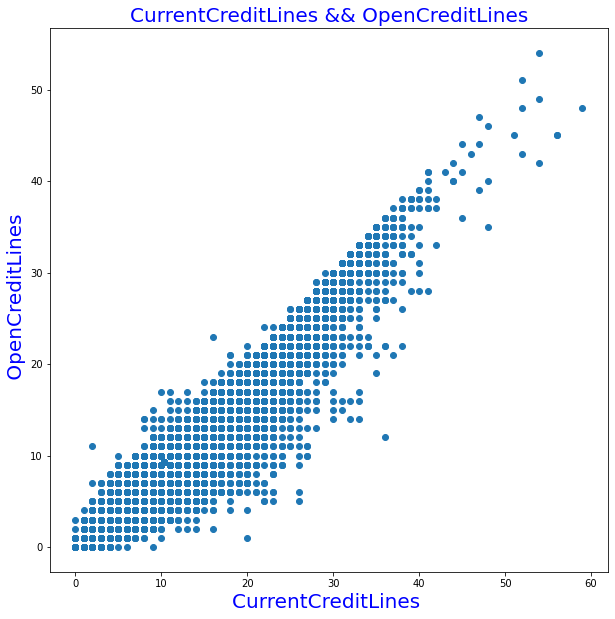

In [22]:
plt.figure(figsize=(10,10))

plt.xlabel('CurrentCreditLines ' , color = 'blue' , fontsize = 20)
plt.ylabel(" OpenCreditLines" , color = 'blue' , fontsize = 20)

plt.title("CurrentCreditLines && OpenCreditLines" , color = 'blue' , fontsize =20)
plt.scatter(data = df , x = 'CurrentCreditLines' , y = 'OpenCreditLines')

## summary for above figure:

relation between column is linear relation and this is positive correlation

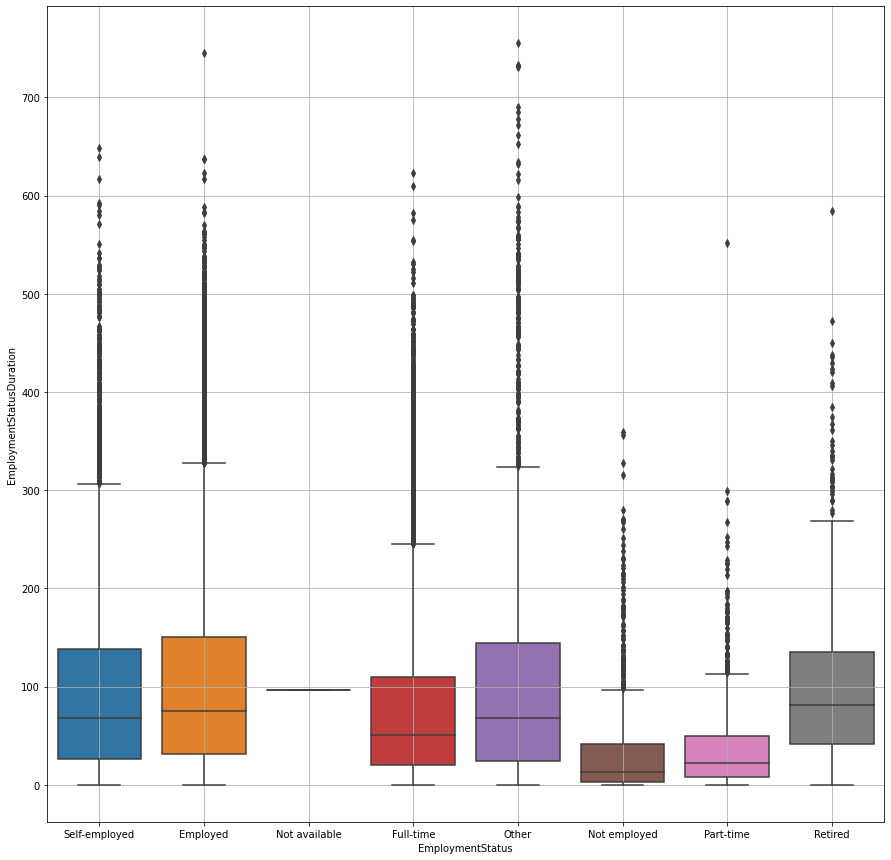

In [23]:
base_color = sns.color_palette()[0]
plt.figure(figsize=(15,15))
sns.boxplot(data = df , x = 'EmploymentStatus' , y='EmploymentStatusDuration')
plt.grid()

## summary for above figure:

i want to draw  boxplot between EmploymentStatusDuration && EmploymentStatus

notice that 75% under 100 duration





Text(0.5, 1.0, 'CreditGrade && BorrowerRate')

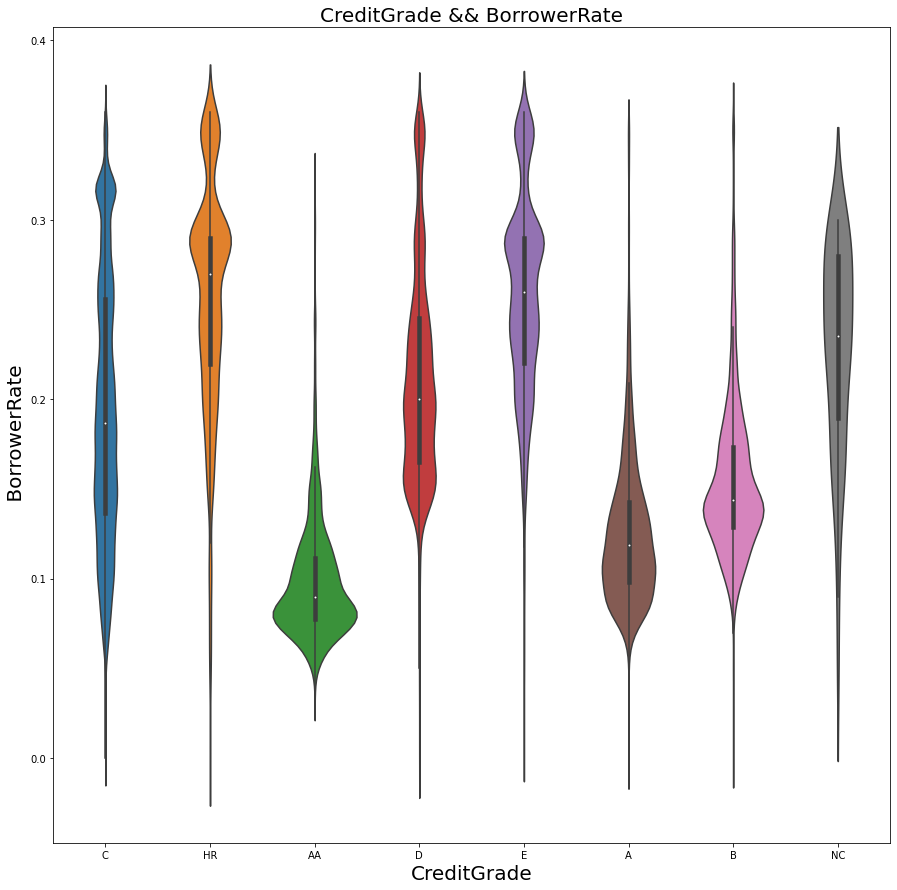

In [24]:
base_color = sns.color_palette()[7]
plt.figure(figsize=(15,15))
sns.violinplot(data = df , x='CreditGrade', y='BorrowerRate' )
plt.xlabel('CreditGrade' , color = 'black' , fontsize = 20)
plt.ylabel(" BorrowerRate" , color = 'black' , fontsize = 20)
plt.title("CreditGrade && BorrowerRate" , color = 'black' , fontsize =20)

### summary for above figure:

50% or greater in (E,HR) is above 0.35 from Borrow rate

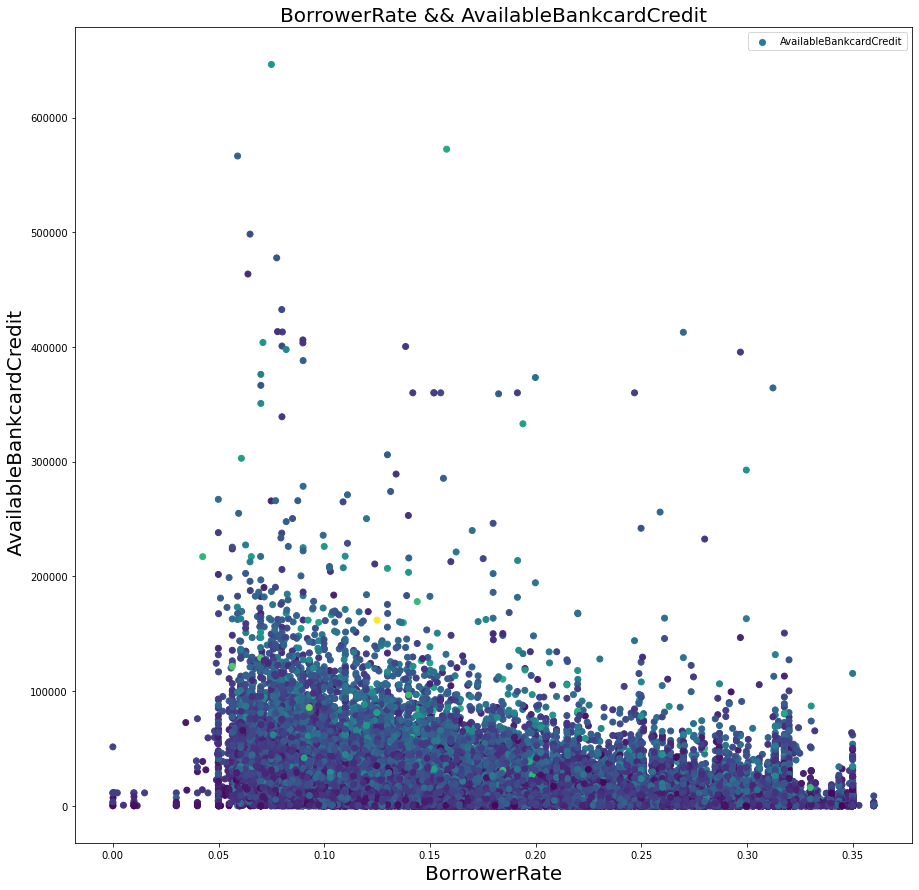

In [25]:
plt.figure(figsize=(15,15))
plt.scatter(data = df , x='BorrowerRate' ,  y ='AvailableBankcardCredit' ,c = 'TotalTrades')
plt.xlabel('BorrowerRate' , color = 'black' , fontsize = 20)
plt.ylabel(" AvailableBankcardCredit" , color = 'black' , fontsize = 20)
plt.title("BorrowerRate && AvailableBankcardCredit" , color = 'black' , fontsize =20)
plt.legend()

## multivariate variable

## first using CreditGrade &(CreditScoreRangeLower - CreditScoreRangeUpper)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


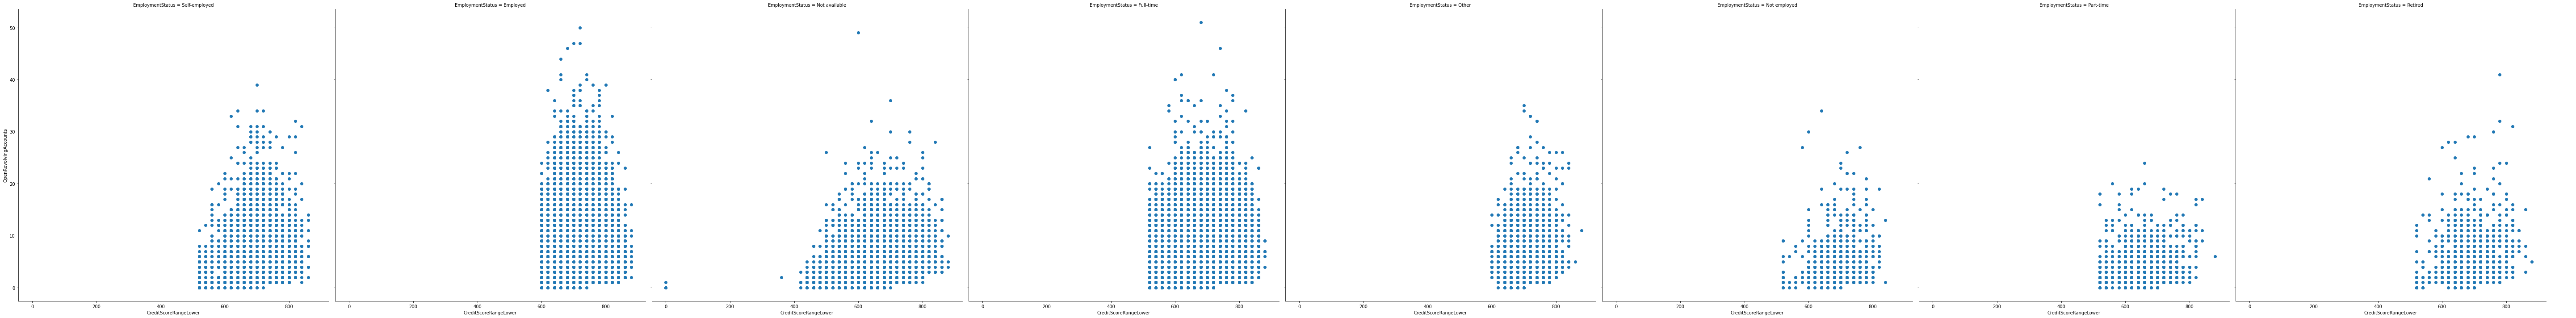

<Figure size 1080x1080 with 0 Axes>

In [26]:
g = sns.FacetGrid(data = df , col = 'EmploymentStatus' , size = 10 )
g.map(plt.scatter , 'CreditScoreRangeLower' ,'OpenRevolvingAccounts')
plt.figure(figsize=(15,15))
g.add_legend()

## summary for above figure



In [27]:
df.head(1)

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,0.168661,0.080306,0.096068,4.072243,C,5.950067,0,CO,Other,Self-employed,2.0,True,True,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.0,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,1.4211,22.934345,22.271949,0.613629,0.04854,8472.311961,2930.313906,-3.223214,0,16.268464,78,19141,9425,2007-09-12 00:00:00,Q3 2007,330.43,11396.14,9425.0,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258


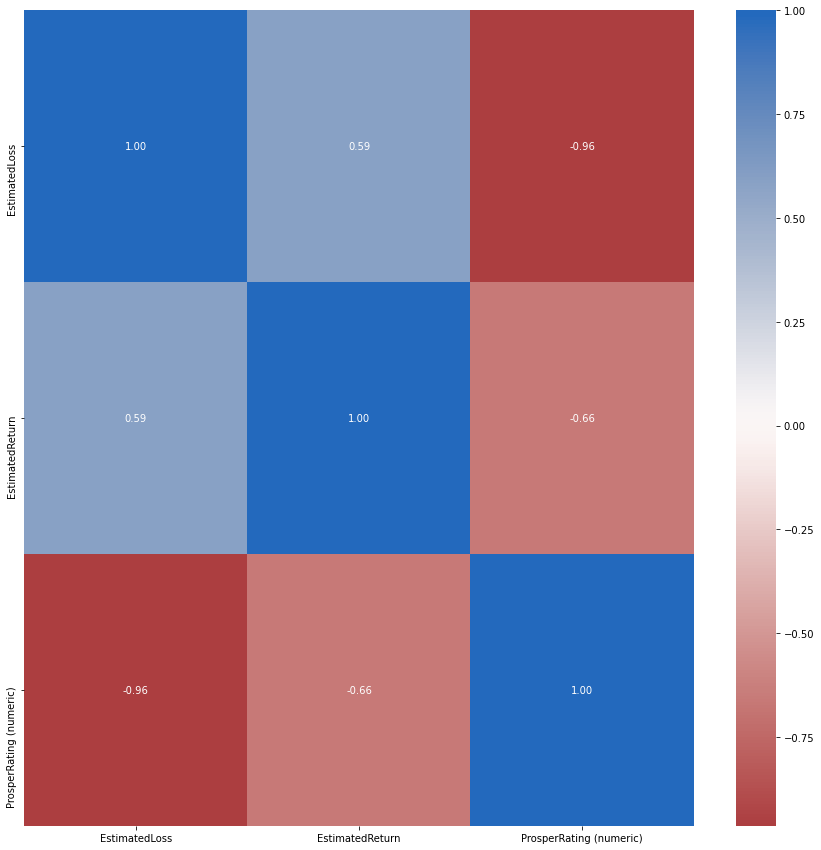

In [35]:
plt.figure(figsize=(15,15))
df2 = df.iloc[: ,10:13]
sns.heatmap(df2.corr() , annot =True ,  fmt = '.2f',cmap = 'vlag_r', center = 0)

### summary for figure above : 

* relation between the three column [EstimatedLoss , EstimatedReturn , ProsperRating (numeric)]


* high positive correlation between [EstimatedReturn ,EstimatedLoss ]
* high negative correlation is between [EstimatedLoss , ProsperRating (numeric)]

<Figure size 1080x1080 with 0 Axes>

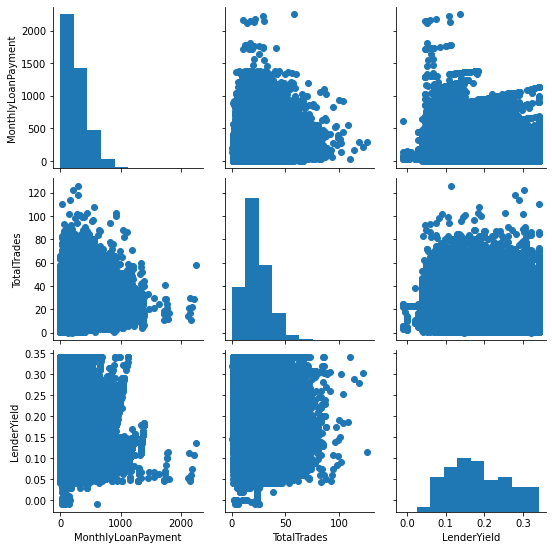

In [29]:
plt.figure(figsize=(15,15))
g = sns.PairGrid(data = df, vars = ['MonthlyLoanPayment', 'TotalTrades','LenderYield'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

## summary

this project pass with alot of step 
* explore data set which have alot of null value in it
* after explore data i started to clean it
###### fill nan value(numeric) with mean
###### fill nan value(categorical) with mode
* drop the rest of row which have nan value 

<h1> ask alot of question to explore data and understand relation between columns </h1>

* i put this question in readme file and graphs give me answer to this question 

* using univariate to give me frequencies to all categories in column
* using bivariate to give me relation between two column
* using multivariate to give me relation between alot of column

